# [EX5] 나랑 닮은 연예인을 찾아보자

#### * 목표
테스트 이미지와 닮은 연예인 찾아보기
#### * 목차
1. 라이브러리 import    
2. 이미지 확인   
3. 얼굴 영역 자르기    
4. 얼굴 영역의 임베딩 추출하기   
 1) 일굴 임베딩 백터 구하기   
 2) 임베딩 딕셔너리 구하기   
 3) 테스트 이미지끼리 얼굴 임베딩 벡터 거리 구하기    
5. 연예인 사진들과 비교하기   
 1) 테스트 사진과 연예인 사진과의 임베딩 백터 거리 비교    
 2) 임베딩 벡터 거리 비교 값 정렬 및 순위 출력   
6. 연예인 닮은꼴 순위  
7. 다양한 시각화 해보기  
8. 결과 및 회고

## 1. 라이브러리 import

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as img
import face_recognition
import numpy as np
from PIL import Image

print('import success')

import success


## 2. 이미지 확인

file_list: ['22.jpg', '24.jpg', '21.jpg', '7.jpg', '0.jpg', '20.jpg', '4.jpg', '19.jpg', '10.jpg', '26.jpg', '12.jpg', '3.jpg', '1.jpg', '23.jpg', '14.jpg', '11.jpg', '15.jpg', '6.jpg', '2.jpg', '8.jpg', '25.jpg']


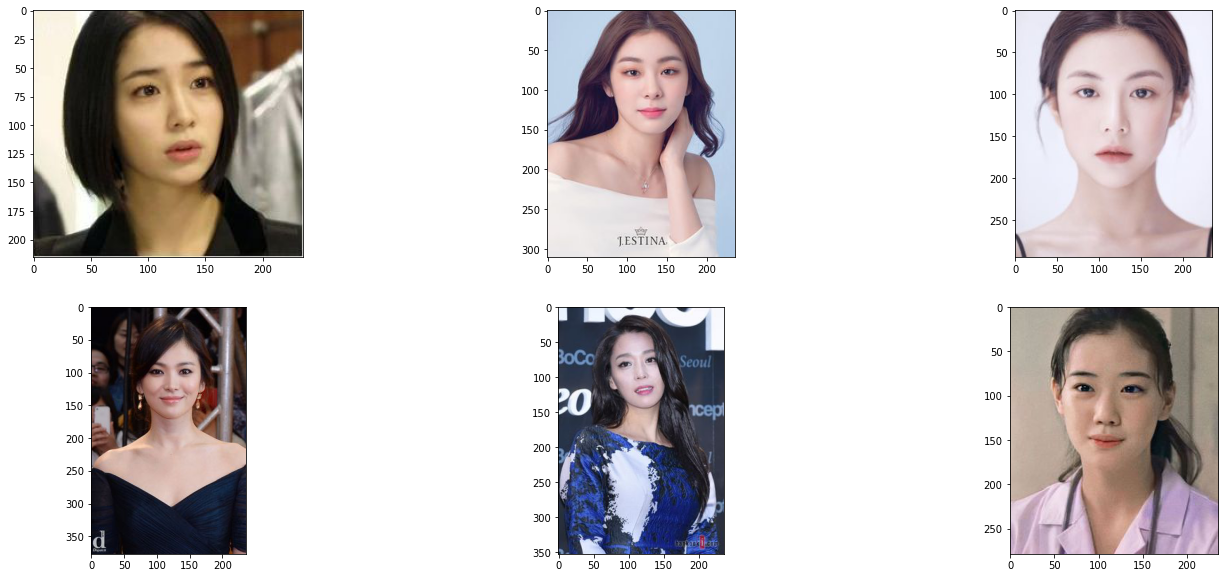

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images2'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path + '/' + file_list[i])
    ax.imshow(image)

plt.show()
fig.tight_layout()

## 3. 얼굴 영역 자르기

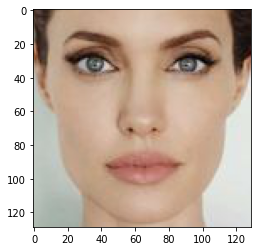

In [3]:
# get_cropped_face : 이미지 파일에서 얼굴 영역을 가져오는 함수
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

# 얼굴 영역 출력 확인
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images2/25.jpg'
cropped_face = get_cropped_face(image_path)

# PIL의 Image.fromarray를 통해서 해서 PIL Image로 변환한 뒤에 저장
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/image_test/1.jpg'
face = get_cropped_face(image_path)
pillow_image = Image.fromarray(face)
pillow_image.save(path_to_save)

plt.imshow(cropped_face)

## 4. 얼굴 영역의 임베딩 추출하기

#### 1) 얼굴 임베딩 벡터 구하기

In [4]:
# get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# 벡터 값 확인
get_face_embedding(cropped_face)

[array([-0.15457946,  0.05026006,  0.13604191, -0.07747336, -0.13230179,
        -0.04963061, -0.05978682, -0.08879571,  0.26418272, -0.11540866,
         0.16398259,  0.00722661, -0.25230899,  0.03476942, -0.04305991,
         0.1863683 , -0.1843421 , -0.15521584, -0.06846215, -0.06756175,
         0.13265659,  0.02518959, -0.02981948,  0.13500984, -0.15836883,
        -0.35290927, -0.16165482,  0.03723387, -0.02631661, -0.16335012,
         0.00480189,  0.13655481, -0.19094415,  0.00266773, -0.06236895,
         0.16668783, -0.07364316, -0.17296019,  0.06564133,  0.09118852,
        -0.25862217, -0.06120645,  0.05644703,  0.26919323,  0.31140327,
         0.01961013,  0.05029466, -0.02946953,  0.05808485, -0.31623685,
         0.01798469,  0.23788464,  0.03040494,  0.09105356,  0.09859753,
        -0.23816463, -0.00315545,  0.05539385, -0.15937771,  0.04714521,
         0.07951117, -0.18664083, -0.00598282, -0.06187633,  0.16582716,
         0.19652796, -0.14450938, -0.12313932,  0.2

#### 2) 임베딩 딕셔너리 구하기

In [5]:
# get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    image_dict={}
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면 len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담김 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            image_dict[os.path.splitext(file)[0]]=face
    return embedding_dict, image_dict

# 딕셔너리 값 확인
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images2'
embedding_dict, image_dict = get_face_embedding_dict(dir_path)
embedding_dict['25']

array([-0.15457946,  0.05026006,  0.13604191, -0.07747336, -0.13230179,
       -0.04963061, -0.05978682, -0.08879571,  0.26418272, -0.11540866,
        0.16398259,  0.00722661, -0.25230899,  0.03476942, -0.04305991,
        0.1863683 , -0.1843421 , -0.15521584, -0.06846215, -0.06756175,
        0.13265659,  0.02518959, -0.02981948,  0.13500984, -0.15836883,
       -0.35290927, -0.16165482,  0.03723387, -0.02631661, -0.16335012,
        0.00480189,  0.13655481, -0.19094415,  0.00266773, -0.06236895,
        0.16668783, -0.07364316, -0.17296019,  0.06564133,  0.09118852,
       -0.25862217, -0.06120645,  0.05644703,  0.26919323,  0.31140327,
        0.01961013,  0.05029466, -0.02946953,  0.05808485, -0.31623685,
        0.01798469,  0.23788464,  0.03040494,  0.09105356,  0.09859753,
       -0.23816463, -0.00315545,  0.05539385, -0.15937771,  0.04714521,
        0.07951117, -0.18664083, -0.00598282, -0.06187633,  0.16582716,
        0.19652796, -0.14450938, -0.12313932,  0.25214118, -0.18

#### 3) 테스트 이미지끼리 얼굴 임베딩 벡터 거리 구하기

In [6]:
# get_distance(name1, name2) : 두 이미지(사람 이름) 사이의 임베딩 벡터 거리를 구하는 함수
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

print(get_distance('25', '26')) # 테스트 사진 2장(25.jpg, 26.jpg)

0.40723219130230187


## 5. 연예인 사진들과 비교하기

#### 1) 테스트 사진과 연예인 사진과의 임베딩 백터 거리 비교

In [7]:
# 테스트 사진 고정 후 연예인 사진들과 비교하면서 임베딩 딕셔너리 값 호출
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('25')

print('get_sort_key_func success')

get_sort_key_func success


#### 2) 임베딩 벡터 거리 비교 값 정렬 및 순위 출력

In [8]:
# 임베딩 벡터 거리 비교 값 오름차순 정렬
def get_nearest_face(name, top=5):
    global  sorted_faces 
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    fig = plt.figure(figsize=(10,5))
    for i in range(top+2):
        if i == 0: # 테스트 사진(25.jpg) 이므로 continue
            continue 
        if i == 1: # 테스트 사진(26.jpg) 이므로 continue
            continue    
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            fig.add_subplot(2,top,i-1)
            plt.imshow(image_dict[sorted_faces[i][0]]) # 순위별 사진 출력

## 6. 연예인 닮은꼴 순위

순위 1 : 이름(10), 거리(0.4181496789674496)
순위 2 : 이름(11), 거리(0.7622768532613373)
순위 3 : 이름(19), 거리(0.7742543561333133)
순위 4 : 이름(2), 거리(0.784886186354948)
순위 5 : 이름(8), 거리(0.7892071382791795)


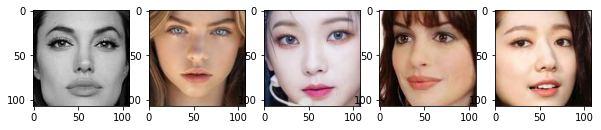

In [9]:
facecc=get_nearest_face('25')

## 7. 다양한 시각화 해보기

#### 1) 얼굴 영역 이미지 파일 출력

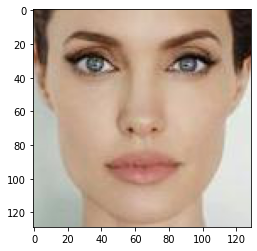

(129, 129, 3)

In [10]:
image_pil = Image.open(path_to_save)
image = np.array(image_pil)

plt.imshow(image)
plt.show()

image.shape # 가로 129, 세로 129, 3(RGB색상 조합)

#### 2) 그래프로 시각화 하기

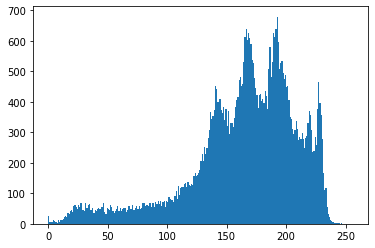

In [11]:
plt.hist(image.ravel(), 256, [0,256])
# ravel() 함수는 numpy값을 1차원 벡터로 변환
plt.show() 

#### 3) 이미지 흑백으로 열기

In [12]:
image_pil = image_pil.convert('L')
image_L = np.array(image_pil)
image_L.shape  #  3 (rgb색상)이 사라짐. 즉 흑백으로 변했다는 것

(129, 129)

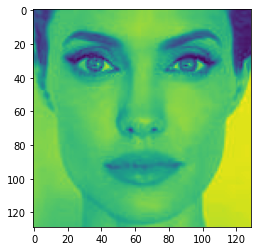

In [13]:
# 흑백으로 보이지가 않음
# 수치적으로 value가 높아질 수록, 노란색 낮아질 수록 짙은 색으로 표현을 한 것
plt.imshow(image_L)
plt.show()

#### 4) 다른 색상으로 cmap 표현 - gray scale 

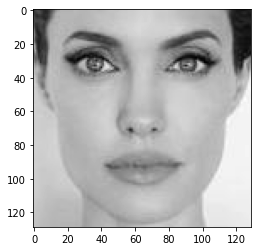

In [14]:
# cmap을 통해서 흑백으로 볼 수 있음
plt.imshow(image_L, cmap='gray')
plt.show()

#### 4) 다른 색상으로 cmap 표현 - jet + colorbar

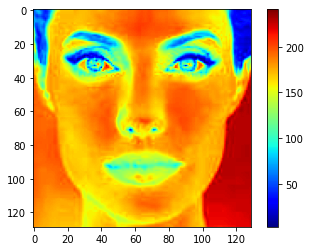

In [15]:
plt.imshow(image_L, 'jet')
plt.colorbar()
plt.show()

#### 5) 이미지 합치기

In [16]:
image_pil3 = Image.open(os.getenv('HOME')+'/aiffel/face_embedding/image_test/2.jpg')
image2 = np.array(image_pil3)

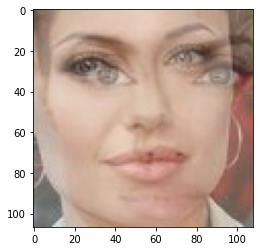

In [17]:
plt.imshow(image, alpha=0.8)
plt.imshow(image2, alpha=0.5)
plt.show()

#### 6) Sublpot

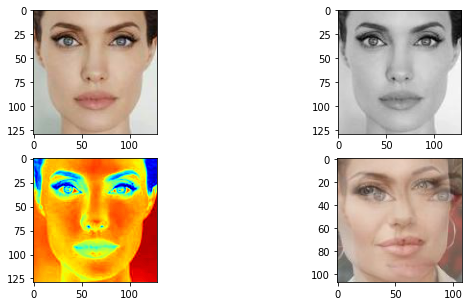

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.imshow(image)
plt.subplot(2,2,2)
plt.imshow(image_L, 'gray')
plt.subplot(2,2,3)
plt.imshow(image_L, 'jet')
plt.subplot(2,2,4)
plt.imshow(image, alpha=0.8)
plt.imshow(image2, alpha=0.5)
plt.show()

## 8. 결과 및 회고

#### * 결과
  * 테스트 이미지 : 안젤리나 졸리
  * 닮은꼴 연예인 : 안젤리나 졸리   
   -> 테스트 이미지와 연예인 이미지의 백터 거리 값이 '0.4181496789674496'으로 최고 가깝다.

#### * 회고
  * 안젤리나 졸리 얼굴 특징에 가깝지 않은 다른 연예인 사진들은, 높은 벡터 거리를 가지고 있음을 알수 있었다.
  * FaceNet은 학습과정에서 Metric Learning을 하기위해 Triplet Loss를 사용한다고 한다.    
  [참고] https://hwangtoemat.github.io/paper-review/2020-04-02-FaceNet-%EB%82%B4%EC%9A%A9/